In [18]:
import pandas as pd
df = pd.read_csv("student_data.csv")
df.head

<bound method NDFrame.head of      student_id school sex  age address_type              family_size  \
0             1     GP   F   18        Urban           Greater than 3   
1             2     GP   F   17        Urban           Greater than 3   
2             3     GP   F   15        Urban  Less than or equal to 3   
3             4     GP   F   15        Urban           Greater than 3   
4             5     GP   F   16        Urban           Greater than 3   
..          ...    ...  ..  ...          ...                      ...   
390         391     MS   M   20        Urban  Less than or equal to 3   
391         392     MS   M   17        Urban  Less than or equal to 3   
392         393     MS   M   21        Rural           Greater than 3   
393         394     MS   M   18        Rural  Less than or equal to 3   
394         395     MS   M   19        Urban  Less than or equal to 3   

       parent_status               mother_education  \
0              Apart               hig

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             395 non-null    int64 
 1   school                 395 non-null    object
 2   sex                    395 non-null    object
 3   age                    395 non-null    int64 
 4   address_type           395 non-null    object
 5   family_size            395 non-null    object
 6   parent_status          395 non-null    object
 7   mother_education       395 non-null    object
 8   father_education       395 non-null    object
 9   mother_job             395 non-null    object
 10  father_job             395 non-null    object
 11  school_choice_reason   395 non-null    object
 12  guardian               395 non-null    object
 13  travel_time            395 non-null    object
 14  study_time             395 non-null    object
 15  class_failures         

In [22]:
df.describe()

,student_id,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [70]:
from matplotlib import pyplot as plt
import seaborn as sns

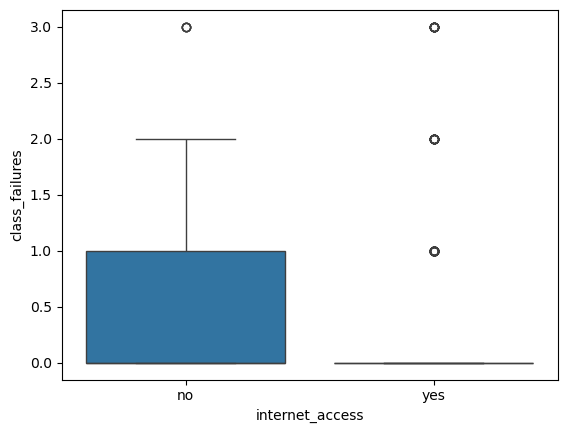

In [72]:
ax = sns.boxplot(data = df, x = 'internet_access', y = 'class_failures')

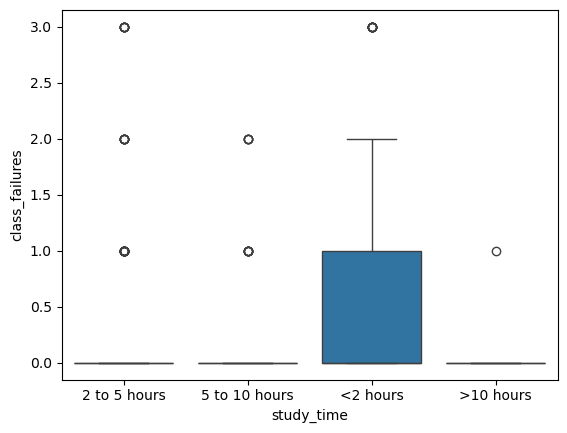

In [74]:
ax = sns.boxplot(data = df, x = 'study_time', y = 'class_failures')

In [76]:
import numpy as np

numeric_df = df.select_dtypes(include='int64')
rs = np.random.RandomState(42)
corr = numeric_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,student_id,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
student_id,1.000000,0.758057,0.026426,-0.016190,0.003895,0.068811,0.086302,0.095454,-0.088902,0.065966,0.046963,-0.053344,-0.099991
age,0.758057,1.000000,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
class_failures,0.026426,0.243665,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
family_relationship,-0.016190,0.053940,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
free_time,0.003895,0.016434,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
social,0.068811,0.126964,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
weekday_alcohol,0.086302,0.131125,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660
weekend_alcohol,0.095454,0.117276,0.141962,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476,0.136291,-0.126179,-0.084927,-0.051939
health,-0.088902,-0.062187,0.065827,0.094056,0.075733,-0.009577,0.077180,0.092476,1.000000,-0.029937,-0.073172,-0.097720,-0.061335
absences,0.065966,0.175230,0.063726,-0.044354,-0.058078,0.044302,0.111908,0.136291,-0.029937,1.000000,-0.031003,-0.031777,0.034247


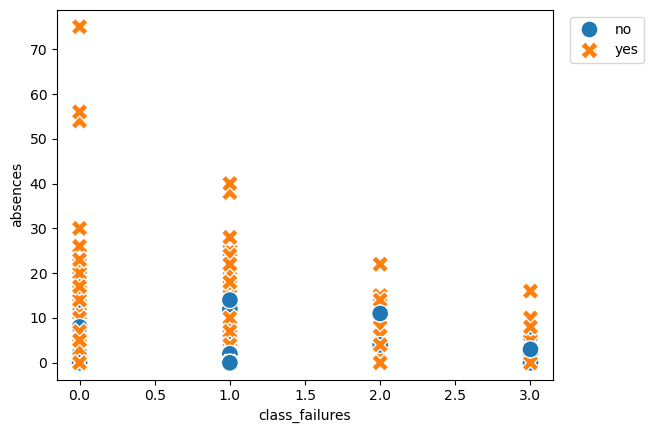

In [78]:
ax = sns.scatterplot(data = df,
                     x = 'class_failures',
                     y = 'absences',
                     hue = 'internet_access',
                     style = 'internet_access',
                     s = 150)
ax = plt.legend(bbox_to_anchor =(1.02,1), loc = 'upper left')
        

In [79]:
x = df[['internet_access','study_time']]
df['failed'] = (df['class_failures'] > 0).astype(int)
y = df['failed']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,
                                                    train_size = 0.8,
                                                    stratify = x['internet_access'],
                                                    random_state=42)

In [84]:
X_train.shape, X_test.shape

((316, 2), (79, 2))

In [86]:
X_train.head()

,internet_access,study_time
10,yes,2 to 5 hours
21,yes,<2 hours
296,yes,2 to 5 hours
375,yes,5 to 10 hours
25,yes,<2 hours


In [88]:
X_test = pd.get_dummies(X_test)
X_test.head()

,internet_access_no,internet_access_yes,study_time_2 to 5 hours,study_time_5 to 10 hours,study_time_<2 hours,study_time_>10 hours
71,False,True,False,False,False,True
72,False,True,True,False,False,False
351,False,True,True,False,False,False
302,False,True,False,True,False,False
18,False,True,False,False,True,False


In [90]:
from sklearn.linear_model import LogisticRegression
dummy_Xtrain = pd.get_dummies(X_train)
clf = LogisticRegression(random_state=42).fit(dummy_Xtrain, Y_train)
dummy_sample = pd.get_dummies(X_train[:2])
dummy_sample = dummy_sample.reindex(columns=dummy_Xtrain.columns, fill_value=0)
clf.predict(dummy_sample)

array([0, 0])

In [92]:
print(pd.Series(Y_train).value_counts())

failed
0    255
1     61
Name: count, dtype: int64


In [94]:
clf = LogisticRegression(random_state=42, class_weight='balanced').fit(dummy_Xtrain, Y_train)

In [96]:
clf.predict(dummy_sample)

array([0, 1])

In [98]:
print(pd.Series(Y_train).value_counts())

failed
0    255
1     61
Name: count, dtype: int64


In [100]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.620253164556962


In [102]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.67      0.72        57
           1       0.37      0.50      0.42        22

    accuracy                           0.62        79
   macro avg       0.57      0.58      0.57        79
weighted avg       0.66      0.62      0.64        79



In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(dummy_Xtrain, Y_train)
predictions = knn_class.predict(X_test)

In [134]:
print(predictions[:5])

[0 0 0 0 0]


In [160]:
y_pred = knn_class.predict(X_test)

print(classification_report(Y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        57
           1       0.00      0.00      0.00        22

    accuracy                           0.72        79
   macro avg       0.36      0.50      0.42        79
weighted avg       0.52      0.72      0.60        79



In [164]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(dummy_Xtrain, Y_train)

DecisionTreeClassifier()

In [166]:
TreePredictions = dtc.predict(X_test)
print(TreePredictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [168]:
y_pred = TreePredictions
print(classification_report(Y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        57
           1       0.00      0.00      0.00        22

    accuracy                           0.72        79
   macro avg       0.36      0.50      0.42        79
weighted avg       0.52      0.72      0.60        79

